In [1]:
#This is the one following the steps of the blog post

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
import colorcet as cc
import statsmodels.api as sm


In [2]:
pwd

'/Volumes/GoogleDrive/My Drive/reference/projects/bernie-texas-2020/notebooks'

In [3]:
#Read in all features
df_all_features = pd.read_csv('../data/interim/all_features-acs5-2018.csv')

In [4]:
df_all_features

,population_2018,fraction_white_nh,fraction_hispanic,fraction_black,fraction_other_race,fraction_w4yrdeg,per_capita_income,fraction_evangelical,fraction_black_protestant,fraction_catholic,...,margin_of_victory_D2012,margin_of_victory_D2016,margin_of_victory_D_avg,population_density,fraction_sanders_2016,votes_sanders_2016,votes_total_2016,fraction_sanders_2020,votes_sanders_2020,votes_total_2020
0,29565,0.626585,0.178759,0.088821,0.105835,0.167776,30858,0.174719,0.035824,0.293240,...,-0.602736,-0.596138,-0.569263,45.731450,0.246269,165,670,0.208374,214,1027
1,595,0.121008,0.842017,0.000000,0.036975,0.031477,15820,0.000000,0.000000,0.300481,...,-0.011976,0.080645,0.045992,0.407967,0.301887,32,106,0.181818,22,121
2,360486,0.298630,0.600706,0.037782,0.062882,0.138725,27649,0.199019,0.003994,0.328276,...,-0.033242,-0.015018,-0.030835,430.013013,0.277728,6175,22234,0.249934,5661,22650
3,21022,0.563933,0.172391,0.126772,0.136904,0.136440,27861,0.137108,0.020217,0.313356,...,-0.492736,-0.509574,-0.465273,21.891199,0.236593,150,634,0.178419,167,936
4,67046,0.388271,0.535274,0.016765,0.059690,0.102115,25281,0.216159,0.007870,0.324424,...,-0.206653,-0.238225,-0.203599,96.686647,0.235718,850,3606,0.254009,1077,4240
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249,8098,0.610645,0.225117,0.018276,0.145962,0.133158,24409,0.320777,0.000000,0.132802,...,-0.628801,-0.667096,-0.601955,7.599464,0.304965,43,141,0.198718,31,156
250,16952,0.635500,0.160453,0.112258,0.091789,0.110698,25876,0.424874,0.026005,0.106188,...,-0.462463,-0.554705,-0.459907,26.949019,0.320856,180,561,0.216102,153,708
251,168838,0.616810,0.196715,0.097223,0.089251,0.162504,30727,0.316690,0.013468,0.116175,...,-0.474597,-0.450552,-0.449168,180.448208,0.292428,1568,5362,0.244973,2388,9748
252,51365,0.690821,0.202901,0.015361,0.090918,0.165837,30498,0.253542,0.008322,0.107889,...,-0.591368,-0.559986,-0.549033,46.554677,0.405606,709,1748,0.223726,628,2807


In [5]:
#convert all fractions to percentages to make transformations easier later.
for col in [col for col in df_all_features if col.startswith('fraction')]:
    df_all_features[col] = df_all_features[col]*100.
df_all_features['margin_of_victory_D2016'] = df_all_features['margin_of_victory_D2016']*100.
df_all_features['margin_of_victory_D2012'] = df_all_features['margin_of_victory_D2012']*100.
df_all_features['margin_of_victory_D2008'] = df_all_features['margin_of_victory_D2008']*100.
df_all_features['margin_of_victory_D_avg'] = df_all_features['margin_of_victory_D_avg']*100.

In [6]:
df_all_features.describe()

,population_2018,fraction_white_nh,fraction_hispanic,fraction_black,fraction_other_race,fraction_w4yrdeg,per_capita_income,fraction_evangelical,fraction_black_protestant,fraction_catholic,...,margin_of_victory_D2012,margin_of_victory_D2016,margin_of_victory_D_avg,population_density,fraction_sanders_2016,votes_sanders_2016,votes_total_2016,fraction_sanders_2020,votes_sanders_2020,votes_total_2020
count,2.540000e+02,254.000000,254.000000,254.000000,254.000000,254.000000,254.000000,254.000000,254.000000,254.000000,...,254.000000,254.000000,254.000000,254.000000,254.000000,254.000000,254.000000,254.000000,254.000000,254.000000
mean,1.097842e+05,56.133645,27.765490,6.342195,9.758670,12.877125,25497.251969,35.157258,1.007050,16.669296,...,-42.941247,-46.639690,-42.071343,116.049030,32.502830,1876.169291,5653.129921,23.798955,2465.901575,8245.779528
std,3.963104e+05,21.205268,21.536645,6.606347,8.063322,4.768760,5292.632800,17.395232,1.715134,15.058276,...,31.718475,32.250308,30.876374,342.792472,9.034068,7689.207220,22444.527416,7.190225,10357.249327,33584.907395
min,1.020000e+02,0.727768,1.675142,0.000000,0.291971,0.000000,13350.000000,0.000000,0.000000,0.000000,...,-92.413793,-90.974729,-90.236631,0.152523,13.995485,1.000000,3.000000,0.000000,0.000000,2.000000
25%,7.099750e+03,41.943510,13.347827,1.072587,4.802172,9.851090,22265.500000,21.662981,0.000000,5.707813,...,-63.742861,-67.246669,-61.560680,6.451737,25.493143,49.250000,143.750000,18.945016,31.250000,161.500000
50%,1.858450e+04,58.800946,19.547162,4.134640,7.463734,12.060235,25128.500000,34.173688,0.000000,12.110402,...,-50.224226,-55.896826,-50.413996,21.656326,32.087453,167.000000,621.000000,23.740085,158.000000,720.000000
75%,4.987325e+04,73.102528,37.867317,9.124621,12.030002,14.596759,28453.750000,46.138508,1.637409,23.373718,...,-34.576876,-40.201470,-33.592784,64.238395,38.730580,573.500000,2096.500000,28.228453,628.750000,2572.250000
max,4.602523e+06,90.657620,94.353147,33.835273,58.288913,33.045579,43439.000000,89.860140,9.192807,91.036415,...,73.349689,60.178876,67.596395,2962.605784,80.000000,74068.000000,222686.000000,52.173913,92158.000000,323314.000000


In [7]:
df_all_features.sort_values('margin_of_victory_D_avg',axis=0)

,population_2018,fraction_white_nh,fraction_hispanic,fraction_black,fraction_other_race,fraction_w4yrdeg,per_capita_income,fraction_evangelical,fraction_black_protestant,fraction_catholic,...,margin_of_victory_D2012,margin_of_victory_D2016,margin_of_victory_D_avg,population_density,fraction_sanders_2016,votes_sanders_2016,votes_total_2016,fraction_sanders_2020,votes_sanders_2020,votes_total_2020
117,228,83.333333,15.789474,0.000000,0.877193,10.691824,31564,89.860140,0.0,0.000000,...,-92.413793,-90.566038,-90.236631,0.250309,33.333333,1,3,50.000000,1,2
41,885,82.033898,13.333333,0.000000,4.632768,19.753086,31632,42.088267,0.0,0.000000,...,-85.774648,-90.974729,-86.973087,0.957732,40.000000,2,5,0.000000,0,11
141,1430,56.223776,14.335664,0.000000,29.440559,15.981735,30902,8.238173,0.0,40.783034,...,-83.391003,-85.927152,-83.369367,1.588505,50.000000,4,8,46.153846,6,13
116,10348,43.602629,44.733282,1.362582,10.301508,11.823777,24260,42.120708,0.0,16.433532,...,-82.439467,-78.414390,-81.579784,11.276206,43.283582,29,67,24.705882,21,85
56,1156,74.480969,12.024221,1.643599,11.851211,13.780025,26103,68.677686,0.0,7.024793,...,-80.615165,-85.528455,-80.914315,1.168189,31.578947,6,19,16.666667,3,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178,7180,5.571031,84.415042,0.682451,9.331476,11.561670,13800,9.400526,0.0,70.483179,...,57.386600,51.001541,53.322971,7.611136,16.790353,362,2156,33.655706,522,1551
25,5282,7.023855,91.840212,0.075729,1.060204,8.640407,17798,6.150943,0.0,86.792453,...,56.688662,56.866446,53.719471,4.648940,18.796199,356,1894,27.863526,343,1231
85,57970,2.482318,90.231154,0.538209,6.748318,9.259032,16891,7.374028,0.0,23.222382,...,58.051690,55.791875,56.956296,45.307725,24.147318,1508,6245,34.104842,2726,7993
11,12131,4.962493,88.673646,0.494601,5.869261,5.609176,13350,11.604008,0.0,29.117068,...,67.560909,57.184923,64.517961,9.350190,18.089234,373,2062,28.234868,779,2759


In [8]:
##this would replace the zero values from two columns
keys_with_zeros = ['fraction_black','fraction_catholic']
for key_loop in keys_with_zeros:
    ind_0 = df_all_features['population_2018'][df_all_features[key_loop] < 0.1].index
    print(key_loop,len(ind_0))
    df_all_features.at[ind_0,key_loop] = 0.1

fraction_black 15
fraction_catholic 8


In [9]:
#add two columns of random numbers
from numpy.random import default_rng
rng = default_rng(42)
vals = rng.standard_normal(df_all_features.shape[0])
vals2 = rng.standard_normal(df_all_features.shape[0])

df_all_features['randNumCol'] = vals
df_all_features['randNumCol2'] = vals2

In [10]:
feature_names_full_dict = {'fraction_white_nh':'Proportion White, Non-Hispanic', 
                           'fraction_hispanic':'Proportion White, Hispanic', 
                           'fraction_black':'Proportion Black', 
                           'fraction_other_race':'Proportion Other Race', 
                           'fraction_w4yrdeg':'Proportion w/4-yr Degree', 
                           'per_capita_income':'Per Capita Income',
                           'fraction_evangelical': 'Proportion Evangelical', 
                           'fraction_black_protestant': 'Proportion Black Protestant', 
                           'fraction_mainline': 'Proportion Mainline', 
                           'fraction_catholic': 'Proportion Catholic', 
                           'fraction_mormon': 'Proportion Mormon',
                           'fraction_jewish': 'Proportion Jewish',
                           'fraction_other_religion': 'Proportion Other Religion',
                           'fraction_unclaimed_religion': 'Proportion Unclaimed by Religion',
                           'margin_of_victory_D2016': 
                           'Dem. Margin of Victory in 2016 Presidential Election',
                           'margin_of_victory_D2012': 
                           'Dem. Margin of Victory in 2012 Presidential Election',
                           'margin_of_victory_D2008': 
                           'Dem. Margin of Victory in 2008 Presidential Election',
                           'margin_of_victory_D_avg': 
                           "Dem. Avg. Margin of Victory in 2008, 2012, and 2016 Presidential Election",
                           'population_density':'Population Density',
                           'fraction_sanders_2016':'Share of Votes for Sanders in 2016',
                           'fraction_sanders_2020':'Share of Votes for Sanders in 2020',
                           'votes_sanders_2016':'Votes for Sanders in 2016',
                           'randNumCol': 'Random Numbers',
                           'delta_fraction_sanders':
                           'Change in Share of Votes for Sanders from 2016 to 2020'}

In [11]:
feature_names_short_dict = {'fraction_white_nh':'Race: White, Non-Hispanic', 
                           'fraction_hispanic':'Race: White, Hispanic', 
                           'fraction_black':'Race: Black', 
                           'fraction_other_race':'Race: Other', 
                           'fraction_w4yrdeg':'4-yr Degree', 
                           'per_capita_income':'Per Capita Income',
                           'fraction_evangelical': 'Religion: Evangelical', 
                            'fraction_black_protestant': 'Religion: Black Protestant', 
                           'fraction_catholic': 'Religion: Catholic', 
                           'fraction_mormon': 'Religion: Mormon',
                            'fraction_jewish': 'Religion Jewish',
                           'fraction_other_religion': 'Religion: Other',
                            'fraction_unclaimed_religion': 'Religion: Unclaimed',
                           'margin_of_victory_D2016': 
                           "Dem. Margin of Victory in '16 General",
                           'margin_of_victory_D2012': 
                           "Dem. Margin of Victory in '12 General",
                           'margin_of_victory_D2008': 
                           "Dem. Margin of Victory in '08 General",
                           'margin_of_victory_D_avg': 
                           "Avg. Dem. Margin of Victory ('08'12'16)",
                           'population_density':'Population Density',
                            'fraction_sanders_2016':'2016 Sanders Share of Votes',
                            'fraction_sanders_2020':'2020 Sanders Share of Votes',
                            'votes_sanders_2016':'2016 Sanders Votes',
                            'randNumCol': 'Random Numbers',
                           'delta_fraction_sanders':'Change in Share of Votes for Sanders'}

In [12]:
df_all_features['delta_fraction_sanders'] = df_all_features['fraction_sanders_2020'] - \
        df_all_features['fraction_sanders_2016']
df_all_features['delta_fraction_sanders_proportional'] = df_all_features['delta_fraction_sanders'] / \
        df_all_features['fraction_sanders_2016']

In [13]:
training_feature_names = ['fraction_white_nh', 'fraction_hispanic', 'fraction_black', 
                    'fraction_other_race', 'fraction_w4yrdeg', 'per_capita_income',
                    'fraction_evangelical', 'fraction_catholic', 'fraction_mormon', 
                    'fraction_black_protestant', 'fraction_unclaimed_religion',
                   'fraction_other_religion', 'margin_of_victory_D_avg', 'population_density', 'fraction_sanders_2016']

In [14]:
#all_features[columns_to_train]

In [15]:
target_feature_name = ['delta_fraction_sanders']

In [16]:
def describe(df, stats):
    d = df.describe()
    return d.append(df.reindex(d.columns, axis=1).agg(stats))

describe(df_all_features[target_feature_name], ['skew', 'mad', 'kurt'])

,delta_fraction_sanders
count,254.000000
mean,-8.703875
std,10.190084
min,-44.285714
25%,-14.978250
50%,-8.045644
75%,-2.651743
max,23.269597
skew,-0.156371
mad,7.909066


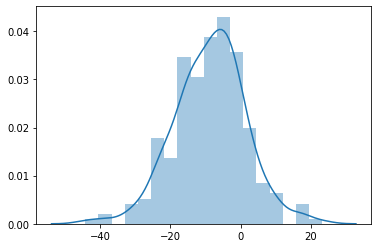

In [17]:
sns.distplot(df_all_features[target_feature_name])

The change in Bernie voter fraction is almost guassian, centered at -9%, has very little skewness (-0.16), and is a bit peakier than a normal distribution (kurt=0.78).

Now let's plot each inpendent feature vs the dependent or target feature (difference Bernie vote fraction)

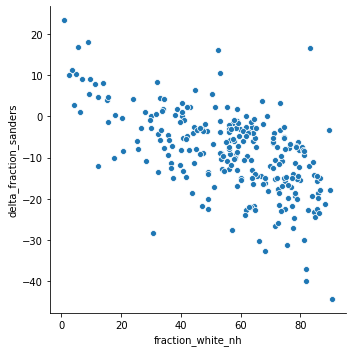

In [18]:
sns.relplot(x='fraction_white_nh', y=target_feature_name[0], data=df_all_features);

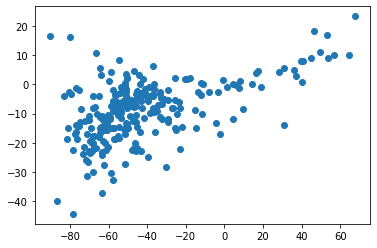

In [19]:
plt.scatter(df_all_features['margin_of_victory_D_avg'],df_all_features[target_feature_name[0]])

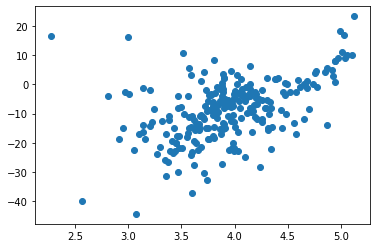

In [20]:
plt.scatter(np.log(df_all_features['margin_of_victory_D_avg']+100),df_all_features[target_feature_name[0]])

In [21]:
#let's visualize relation of dependent to all posssible variables
df_all_num_features = df_all_features.drop(labels='County',axis=1)
print(len(df_all_num_features.keys()))

#getting array of perceptually uniform colors
col_n = np.linspace(0,1, len(df_all_num_features.keys()))
#colors = plt.cm.viridis(col_n)
colors = plt.cm.gist_rainbow(col_n)
print(len(colors))


31
31


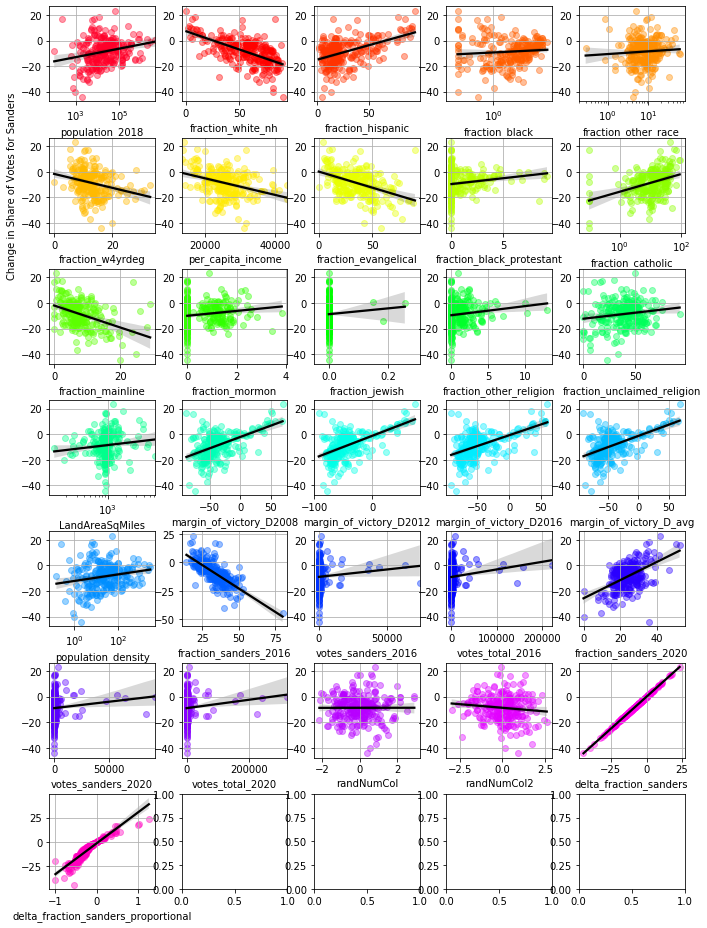

In [22]:
%matplotlib inline

keys_with_logx = ['population_2018','fraction_black','fraction_other_race',\
                  'fraction_catholic','LandAreaSqMiles','population_density']

fig, axs = plt.subplots(ncols=5, nrows=7, figsize=(10, 13))
axsf = axs.flat
for ii, (key, col) in enumerate(zip(df_all_num_features.keys(),colors)):
    if key in keys_with_logx:
        logx = True
    else:
        logx = False
    if ii == 5:
        sns.regplot(x=key, y=target_feature_name[0], 
                    data=df_all_features, ax=axsf[ii], logx=logx, 
                    scatter_kws={'alpha':0.4,'color':[col]},
                    line_kws={'color':'black'})
        axsf[ii].set_ylabel(feature_names_short_dict[target_feature_name[0]])
    else:
        sns.regplot(x=key, y=target_feature_name[0], 
                    data=df_all_features, ax=axsf[ii], logx=logx,
                    scatter_kws={'alpha':0.4,'color':[col]},
                    line_kws={'color':'black'})
        axsf[ii].set_ylabel('')

    if key in keys_with_logx:
        axsf[ii].set_xscale('log')
    axsf[ii].set_xlabel(key)
    axsf[ii].grid()


fig.tight_layout()
fig.subplots_adjust(wspace=0.25,hspace=0.38)

In [23]:
#getting array of perceptually uniform colors
col_n = np.linspace(0,1,16)
#colors = plt.cm.viridis(col_n)
colors = plt.cm.gist_rainbow(col_n)
#colors = plt.cm.nipy_spectral(col_n)
#colors = cc.cm.colorwheel(col_n)
#colors = cc.cm.glasbey_light(col_n)
#colors = cc.cm.CET_R3(col_n)
#then you can plot with col[0], col[1], etc.

In [24]:
len(training_feature_names)

15

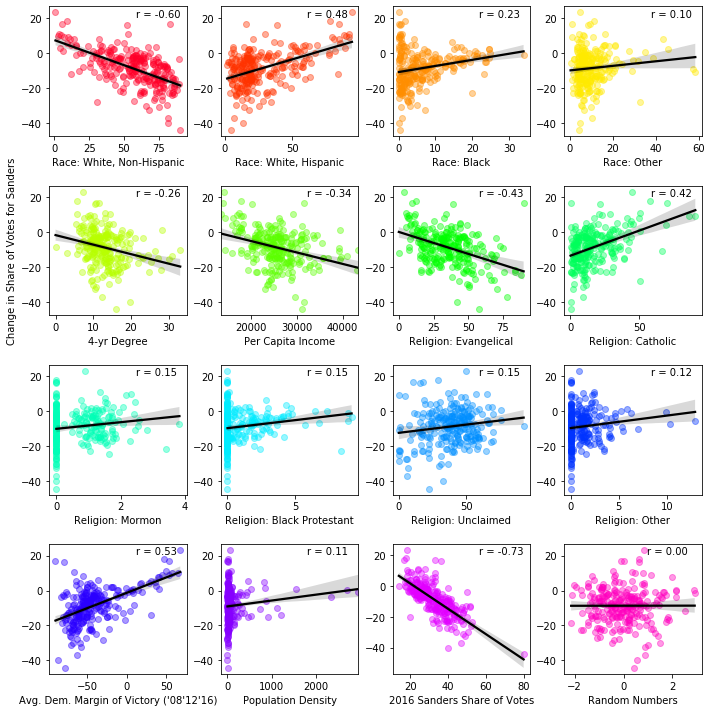

In [25]:
%matplotlib inline
fig, axs = plt.subplots(ncols=4, nrows=4, figsize=(10, 10))
axsf = axs.flat
for ii, (key, col) in enumerate(zip(training_feature_names[0:],colors[:-1])):
    r = stats.pearsonr(df_all_features[key], df_all_features[target_feature_name[0]])
    #print(r)
    if ii == 4:
        sns.regplot(x=key, y=target_feature_name[0], 
                    data=df_all_features, ax=axsf[ii], 
                    scatter_kws={'alpha':0.4,'color':[col]},
                    line_kws={'color':'black'})
        axsf[ii].set_ylabel(feature_names_short_dict[target_feature_name[0]])
    else:
        sns.regplot(x=key, y=target_feature_name[0], 
                    data=df_all_features, ax=axsf[ii], 
                    scatter_kws={'alpha':0.4,'color':[col]},
                    line_kws={'color':'black'})
        axsf[ii].set_ylabel('')
    
    axsf[ii].text(0.63,0.92,"r = {0:.2f}".format(r[0]), transform=axsf[ii].transAxes)

    axsf[ii].set_xlabel(feature_names_short_dict[key])
    #axsf[ii].grid()

#add panel for random independent variable
sns.regplot(x='randNumCol', y=target_feature_name[0], 
                    data=df_all_features, ax=axsf[-1], 
                    scatter_kws={'alpha':0.4,'color':[colors[-1]]},
                    line_kws={'color':'black'})
axsf[-1].set_ylabel('')
axsf[-1].set_xlabel(feature_names_short_dict['randNumCol'])
r = stats.pearsonr(df_all_features['randNumCol'], df_all_features[target_feature_name[0]])
axsf[-1].text(0.6,0.92,"r = {0:.2f}".format(r[0]), transform=axsf[-1].transAxes)
#axsf[-1].grid()


'''
#add panel for proportional decrease in share of voters for Bernie
sns.regplot(x=training_feature_names[-1], y='delta_fraction_sanders_proportional', 
                    data=df_all_features, ax=axsf[-1], 
                    scatter_kws={'alpha':0.4,'color':[colors[-1]]},
                    line_kws={'color':'black'})
axsf[-1].set_ylabel('delta_fraction_sanders_proportional')
axsf[-1].set_xlabel(training_feature_names[-1])
axsf[-1].grid()
'''

fig.tight_layout()
#fig.subplots_adjust(wspace=0.19,hspace=0.38) #4,3
fig.subplots_adjust(wspace=0.25,hspace=0.38) #4,3
#sns.boxplot(x='education',y='wage', data=df_melt, ax=axs[2])
fig.savefig('../reports/figures/Figure-scatter.png')

In [26]:
all_training_and_target_names = \
np.concatenate((training_feature_names, target_feature_name), axis=None)

In [27]:
df_all_training_and_target = df_all_features[all_training_and_target_names]

In [28]:
#Needed for model training
from sklearn import linear_model
from sklearn.model_selection import train_test_split, KFold, RepeatedKFold, cross_val_score
from sklearn.preprocessing import scale, StandardScaler

In [29]:
#Prep for leave one out (for predicted R^2)

#You can write a simple wrapper to make statsmodels objects look like sklearn estimators:
#https://stackoverflow.com/questions/41045752/using-statsmodel-estimations-with-scikit-learn-cross-validation-is-it-possible

import statsmodels.api as sm
from sklearn.base import BaseEstimator, RegressorMixin

class SMWrapper(BaseEstimator, RegressorMixin):
    """ A universal sklearn-style wrapper for statsmodels regressors """
    def __init__(self, model_class, fit_intercept=True):
        self.model_class = model_class
        self.fit_intercept = fit_intercept
    def fit(self, X, y):
        if self.fit_intercept:
            X = sm.add_constant(X)
        self.model_ = self.model_class(y, X)
        self.results_ = self.model_.fit()
    def predict(self, X):
        if self.fit_intercept:
            X = sm.add_constant(X)
        return self.results_.predict(X)
    
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import r2_score as r2

#Needed for VIFs
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [30]:
#let's work with a subset of features for now
features_group = 'all' #'less'#'all_but_fraction_sanders_2016'


if features_group == 'manual':
    features_train = ['fraction_white_nh', 'fraction_black', 
                    'fraction_w4yrdeg', 
                      'fraction_evangelical','margin_of_victory_D_avg']


if features_group == 'all':
    features_train = training_feature_names.copy()
    
if features_group == 'all_but_fraction_sanders_2016':
    features_train = training_feature_names.copy()
    features_train.remove('fraction_sanders_2016')

if features_group == 'race_only':
    features_train = ['fraction_white_nh', 'fraction_hispanic', 'fraction_black', 
                    'fraction_other_race']
if features_group == 'all_but_4yr':
    features_train = ['fraction_white_nh', 'fraction_hispanic', 'fraction_black', 
                    'fraction_other_race', 'per_capita_income',
                    'fraction_evangelical', 'fraction_catholic', 'fraction_mormon', 
                   'fraction_other_religion', 'margin_of_victory_D2016', 'population_density']
    
    
if features_group == 'less':
    features_train = ['fraction_white_nh', 'fraction_hispanic', 'fraction_black', 'per_capita_income',
                    'fraction_evangelical','fraction_catholic', 'margin_of_victory_D2016', 'population_density']
    
if features_group == 'very_few':
    features_train = ['fraction_white_nh', 'per_capita_income',
                    'fraction_evangelical', 'margin_of_victory_D2016', 'population_density']
    
if features_group == 'very_few_no_mov':
    features_train = ['fraction_white_nh', 'per_capita_income',
                    'fraction_evangelical', 'population_density']
    
if features_group == 'very_few_no_mov_wb':
    features_train = ['fraction_white_nh', 'fraction_black', 'per_capita_income',
                    'fraction_evangelical', 'population_density']
    
if features_group == 'very_few_no_mov_wb_no_pd':
    features_train = ['fraction_white_nh', 'fraction_black', 'per_capita_income',
                    'fraction_evangelical']
    
data_train = df_all_features[features_train]

X = data_train.drop(['fraction_hispanic','fraction_sanders_2016'],axis=1)
y = df_all_features[target_feature_name]

X_constant = sm.add_constant(X) #For statsmodel

X_og = X.copy()
    
if 'population_2018' in X.columns: X['population_2018'] = np.log(X['population_2018'])
#if 'margin_of_victory_D_avg' in X.columns: X['margin_of_victory_D_avg**2'] = X['margin_of_victory_D_avg']**2.
#if 'fraction_hispanic' in X.columns: X['fraction_hispanic'] = np.log(X['fraction_hispanic'])
if 'fraction_black' in X.columns: 
    X['log_fraction_black'] = np.log(X['fraction_black'])
    X = X.drop('fraction_black',axis=1)
if 'population_density' in X.columns: 
    X['log_population_density'] = np.log(X['population_density'])
    X = X.drop('population_density',axis=1)
if 'fraction_catholic' in X.columns:
    X['log_fraction_catholic'] = np.log(X['fraction_catholic'])
    X = X.drop('fraction_catholic',axis=1)
if 'fraction_other_race' in X.columns:
    X['log_fraction_other_race'] = np.log(X['fraction_other_race'])
    X = X.drop('fraction_other_race',axis=1)

In [31]:
#standardize features
#We've learned that standardizing features with regression is not necessary
scaler = StandardScaler() #add with_std=False if you only want to center values (i.e. subtract mean)
scaler.fit(X)
X_new_arr = scaler.transform(X) 
X_new = pd.DataFrame(X_new_arr, columns=X.columns)
X_new_constant = sm.add_constant(X_new) #For statsmodel
#to inverse:
#X_new_inv = scaler.inverse_transform(X_new)

In [32]:
#scikitlearn modeling
model = linear_model.LinearRegression().fit(X, y)
#We don't need to add a column of ones to properly fit the coeff of the constant term because 
#LinearRegression fits the y-intercept by default (fit_intercept=True)
r_squared = model.score(X, y)
print(r_squared)

#weighted fit
sqrt_pop = np.sqrt(df_all_features['population_2018']) #for weighting
model = linear_model.LinearRegression().fit(X, y, sample_weight=sqrt_pop)
r_squared = model.score(X, y, sample_weight=sqrt_pop)
print(r_squared)

0.481640271786591
0.6571239660568505


In [33]:
#scikitlearn modeling
model = linear_model.LinearRegression().fit(X_new, y)
#We don't need to add a column of ones to properly fit the coeff of the constant term because 
#LinearRegression fits the y-intercept by default (fit_intercept=True)
r_squared = model.score(X_new, y)
print(r_squared)

#weighted fit
sqrt_pop = np.sqrt(df_all_features['population_2018']) #for weighting
model = linear_model.LinearRegression().fit(X_new, y, sample_weight=sqrt_pop)
r_squared = model.score(X_new, y, sample_weight=sqrt_pop)
print(r_squared)

0.481640271786591
0.6571239660568506


In [34]:
#features_train = ['fraction_white_nh', 'fraction_hispanic', 'fraction_black', 'fraction_other_race']

X = df_all_features[features_train].drop(['fraction_hispanic','fraction_sanders_2016','fraction_mormon',\
                                          'fraction_black_protestant','fraction_other_religion'],axis=1)
y = df_all_features[target_feature_name]
    
if 'fraction_black' in X.columns: 
    X['log_fraction_black'] = np.log(X['fraction_black'])
    X = X.drop('fraction_black',axis=1)
if 'population_density' in X.columns: 
    X['log_population_density'] = np.log(X['population_density'])
    X = X.drop('population_density',axis=1)
if 'fraction_catholic' in X.columns:
    X['log_fraction_catholic'] = np.log(X['fraction_catholic'])
    X = X.drop('fraction_catholic',axis=1)
if 'fraction_other_race' in X.columns:
    X['log_fraction_other_race'] = np.log(X['fraction_other_race'])
    X = X.drop('fraction_other_race',axis=1)

X_constant = sm.add_constant(X) #For statsmodel

## fit a OLS model with intercept
model_fit = sm.OLS(y, X_constant).fit()
print(model_fit.summary())
folds_sm = KFold(n_splits = len(X))
y_pred_sm = cross_val_predict(SMWrapper(sm.OLS), X_constant, y, cv=folds_sm) #SMWrapper(sm.OLS) is identical to model
r2_score_sm = r2(y,y_pred_sm)
print('Predicted R^2',r2_score_sm)

# For each X, calculate VIF and save in dataframe
vif = pd.DataFrame()
X_df = pd.DataFrame(X)
vif["VIF Factor"] = [variance_inflation_factor(X_df.values, i) for i in range(X_df.shape[1])]
vif["features"] = X_df.columns
print(vif)

                              OLS Regression Results                              
Dep. Variable:     delta_fraction_sanders   R-squared:                       0.465
Model:                                OLS   Adj. R-squared:                  0.442
Method:                     Least Squares   F-statistic:                     21.08
Date:                    Mon, 31 Aug 2020   Prob (F-statistic):           5.25e-28
Time:                            15:22:18   Log-Likelihood:                -870.23
No. Observations:                     254   AIC:                             1762.
Df Residuals:                         243   BIC:                             1801.
Df Model:                              10                                         
Covariance Type:                nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------

<ipython-input-35-af69a8f9f11a>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_for_heatmap['randNumCol'] = vals


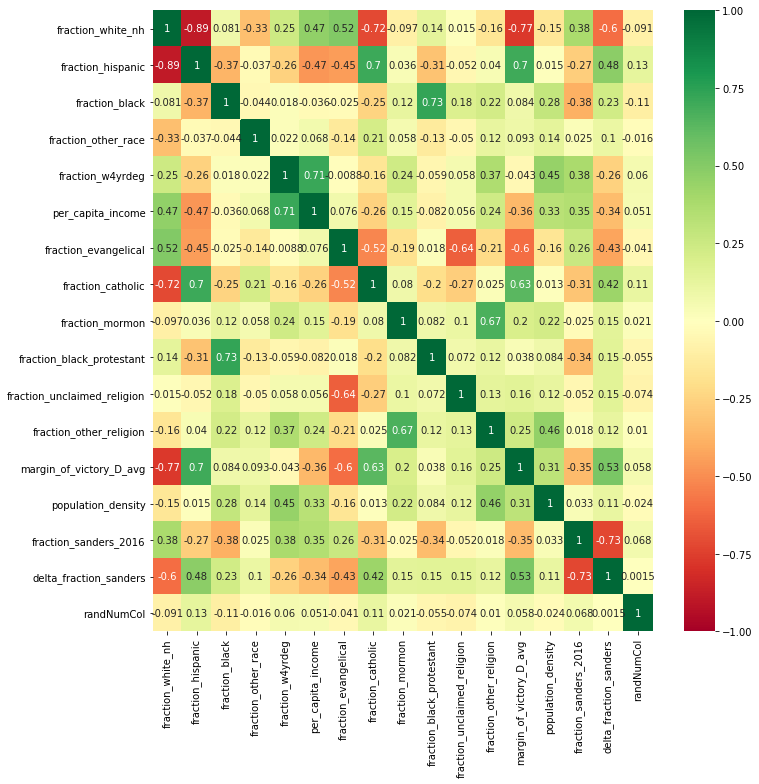

In [35]:
%matplotlib inline
df_for_heatmap = df_all_features[all_training_and_target_names]

df_for_heatmap['randNumCol'] = vals
#df_for_heatmap['randNumCol2'] = vals2

#get correlations of each features in dataset
#corrmat = data.corr()
#top_corr_features = corrmat.index
plt.figure(figsize=(11,11))
#plot heat map
g=sns.heatmap(df_for_heatmap.corr(),annot=True,cmap="RdYlGn",vmin=-1, vmax=1)
plt.tight_layout()

* We see that the change in Sanders support is most strongly coorelated with the fraction white nh.
* We see the two most correlated features are fraction white and fraction hispanic, which I'm a bit surprised by.
* Then you also see next most correated features are fraction white and margin of victory in 2016, which tells me that the more white a county the more likely their Bernie 2016 voters switched to other candidate from Bernie in 2020.


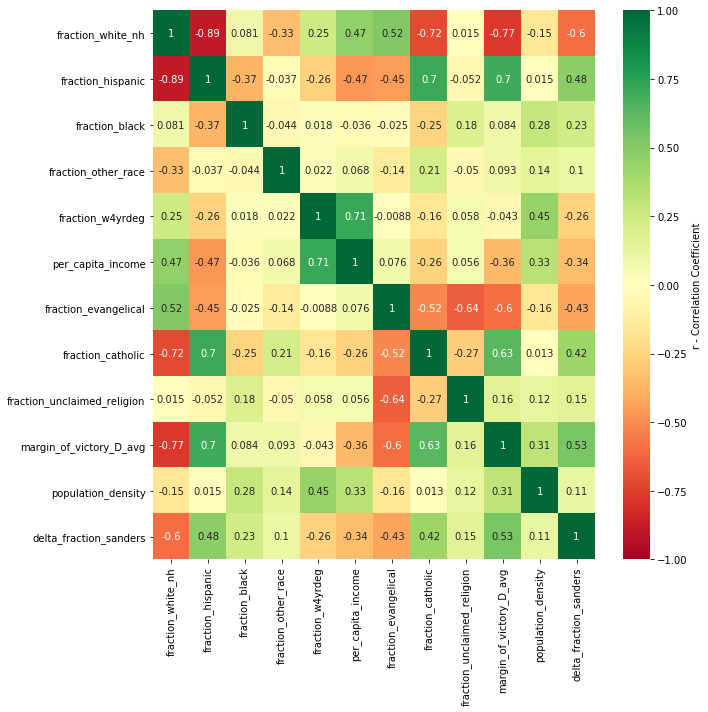

In [64]:
%matplotlib inline
df_for_heatmap = df_all_features[features_train].drop(['fraction_sanders_2016','fraction_mormon',\
                                          'fraction_black_protestant','fraction_other_religion'],axis=1)
df_for_heatmap['delta_fraction_sanders'] = df_all_features['delta_fraction_sanders']

#df_for_heatmap['randNumCol'] = vals
#df_for_heatmap['randNumCol2'] = vals2

#get correlations of each features in dataset
#corrmat = data.corr()
#top_corr_features = corrmat.index
plt.figure(figsize=(10,10))
#plot heat map
g=sns.heatmap(df_for_heatmap.corr(),annot=True,cmap="RdYlGn",vmin=-1, vmax=1, 
                             cbar_kws={'label': 'r - Correlation Coefficient'})
plt.tight_layout()
plt.savefig('../reports/figures/Figure-heatmap.png')

What happens to this heatmap if we restrict our sample to the largest counties by population
that make up 85% of the total texas population or even just the countries that make up 85% of the 2020 primary vote?

What would it take to make that:
-sort counties by population from highest to lowest
-calculate the cumulative population
-Get the county IDs of the counties below 85% cumulative population
-Slice X and y, and run fit and plot again.

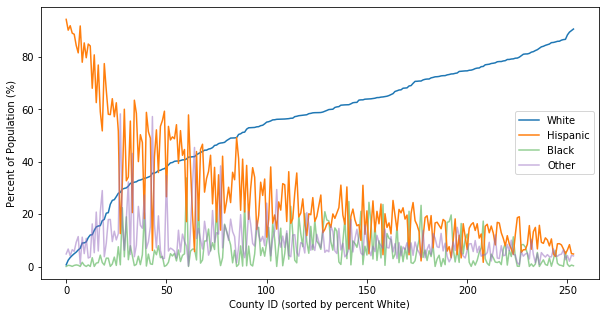

In [37]:
f3, ax = plt.subplots(figsize=(10,5))
df_whites = df_all_features.sort_values('fraction_white_nh', axis=0)
plt.plot(np.arange(0,len(df_whites)),df_whites['fraction_white_nh'],label='White',zorder=3)
plt.plot(np.arange(0,len(df_whites)),df_whites['fraction_hispanic'],label='Hispanic',zorder=4)
plt.plot(np.arange(0,len(df_whites)),df_whites['fraction_black'],label='Black',zorder=2,alpha=0.5)
plt.plot(np.arange(0,len(df_whites)),df_whites['fraction_other_race'],color='C4',label='Other',zorder=5,alpha=0.5)
plt.legend()
plt.ylabel('Percent of Population (%)')
plt.xlabel('County ID (sorted by percent White)')
plt.savefig('../reports/figures/Figure-race-percent3.png')

Text(0.5, 0, 'County ID (sorted by percent Evangelical)')

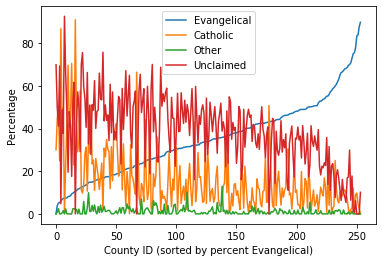

In [38]:
df_whites = df_all_features.sort_values('fraction_evangelical', axis=0)
plt.plot(np.arange(0,len(df_whites)),df_whites['fraction_evangelical'],label='Evangelical')
plt.plot(np.arange(0,len(df_whites)),df_whites['fraction_catholic'],label='Catholic')
plt.plot(np.arange(0,len(df_whites)),df_whites['fraction_other_religion'],label='Other')
plt.plot(np.arange(0,len(df_whites)),df_whites['fraction_unclaimed_religion'],label='Unclaimed')
plt.legend()
plt.ylabel('Percentage')
plt.xlabel('County ID (sorted by percent Evangelical)')

In [39]:
df_all_features_sorted = df_all_features.sort_values('population_2018',ascending=False)
df_all_features_sorted['population_2018_cumsum'] = df_all_features_sorted['population_2018'].cumsum()/df_all_features_sorted['population_2018'].sum()
print(df_all_features_sorted['population_2018_cumsum'].le(0.85).value_counts())
df_all_features_sub = df_all_features_sorted[df_all_features_sorted['population_2018_cumsum'].le(0.85)]

False    210
True      44
Name: population_2018_cumsum, dtype: int64


In [40]:
#features_train = ['fraction_white_nh', 'fraction_hispanic', 'fraction_black', 'fraction_other_race']

X = df_all_features_sub[features_train].drop(['fraction_hispanic','fraction_sanders_2016','fraction_mormon',
                                          'fraction_black_protestant','fraction_other_religion'],axis=1)
y = df_all_features_sub[target_feature_name]
    
if 'fraction_black' in X.columns: 
    X['log_fraction_black'] = np.log(X['fraction_black'])
    X = X.drop('fraction_black',axis=1)
if 'population_density' in X.columns: 
    X['log_population_density'] = np.log(X['population_density'])
    X = X.drop('population_density',axis=1)
if 'fraction_catholic' in X.columns:
    X['log_fraction_catholic'] = np.log(X['fraction_catholic'])
    X = X.drop('fraction_catholic',axis=1)
if 'fraction_other_race' in X.columns:
    X['log_fraction_other_race'] = np.log(X['fraction_other_race'])
    X = X.drop('fraction_other_race',axis=1)
    
X_constant = sm.add_constant(X) #For statsmodel

## fit a OLS model with intercept
model_fit = sm.OLS(y, X_constant).fit()
print(model_fit.summary())
folds_sm = KFold(n_splits = len(X))
y_pred_sm = cross_val_predict(SMWrapper(sm.OLS), X_constant, y, cv=folds_sm) #SMWrapper(sm.OLS) is identical to model
r2_score_sm = r2(y,y_pred_sm)
print('Predicted R^2',r2_score_sm)

# For each X, calculate VIF and save in dataframe
vif = pd.DataFrame()
X_df = pd.DataFrame(X)
vif["VIF Factor"] = [variance_inflation_factor(X_df.values, i) for i in range(X_df.shape[1])]
vif["features"] = X_df.columns
print(vif)

                              OLS Regression Results                              
Dep. Variable:     delta_fraction_sanders   R-squared:                       0.806
Model:                                OLS   Adj. R-squared:                  0.748
Method:                     Least Squares   F-statistic:                     13.75
Date:                    Mon, 31 Aug 2020   Prob (F-statistic):           4.10e-09
Time:                            15:22:25   Log-Likelihood:                -112.13
No. Observations:                      44   AIC:                             246.3
Df Residuals:                          33   BIC:                             265.9
Df Model:                              10                                         
Covariance Type:                nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------

In [41]:
features_train_now = ['fraction_white_nh', 'fraction_black', 'fraction_other_race']

X = df_all_features_sub[features_train_now]
y = df_all_features_sub[target_feature_name]
    
if 'fraction_black' in X.columns: 
    X['log_fraction_black'] = np.log(X['fraction_black'])
    X = X.drop('fraction_black',axis=1)
if 'population_density' in X.columns: 
    X['log_population_density'] = np.log(X['population_density'])
    X = X.drop('population_density',axis=1)
if 'fraction_catholic' in X.columns:
    X['log_fraction_catholic'] = np.log(X['fraction_catholic'])
    X = X.drop('fraction_catholic',axis=1)
if 'fraction_other_race' in X.columns:
    X['log_fraction_other_race'] = np.log(X['fraction_other_race'])
    X = X.drop('fraction_other_race',axis=1)
    
X_constant = sm.add_constant(X) #For statsmodel

## fit a OLS model with intercept
model_fit = sm.OLS(y, X_constant).fit()
print(model_fit.summary())
folds_sm = KFold(n_splits = len(X))
y_pred_sm = cross_val_predict(SMWrapper(sm.OLS), X_constant, y, cv=folds_sm) #SMWrapper(sm.OLS) is identical to model
r2_score_sm = r2(y,y_pred_sm)
print('Predicted R^2',r2_score_sm)

# For each X, calculate VIF and save in dataframe
vif = pd.DataFrame()
X_df = pd.DataFrame(X)
vif["VIF Factor"] = [variance_inflation_factor(X_df.values, i) for i in range(X_df.shape[1])]
vif["features"] = X_df.columns
print(vif)

                              OLS Regression Results                              
Dep. Variable:     delta_fraction_sanders   R-squared:                       0.767
Model:                                OLS   Adj. R-squared:                  0.749
Method:                     Least Squares   F-statistic:                     43.88
Date:                    Mon, 31 Aug 2020   Prob (F-statistic):           1.01e-12
Time:                            15:22:26   Log-Likelihood:                -116.22
No. Observations:                      44   AIC:                             240.4
Df Residuals:                          40   BIC:                             247.6
Df Model:                               3                                         
Covariance Type:                nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------

<ipython-input-41-c97ab10cd941>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['log_fraction_black'] = np.log(X['fraction_black'])


Predicted R^2 0.7215616961280167
   VIF Factor                 features
0    6.584909        fraction_white_nh
1    6.285199       log_fraction_black
2    8.116921  log_fraction_other_race


Text(0.5, 0, 'County ID (sorted by percent White)')

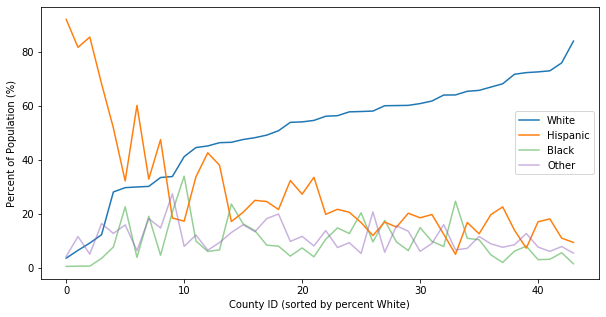

In [42]:
f3, ax = plt.subplots(figsize=(10,5))
df_whites = df_all_features_sorted[df_all_features_sorted['population_2018_cumsum'].le(0.85)].sort_values('fraction_white_nh', axis=0)
plt.plot(np.arange(0,len(df_whites)),df_whites['fraction_white_nh'],label='White',zorder=3)
plt.plot(np.arange(0,len(df_whites)),df_whites['fraction_hispanic'],label='Hispanic',zorder=4)
plt.plot(np.arange(0,len(df_whites)),df_whites['fraction_black'],label='Black',zorder=2,alpha=0.5)
plt.plot(np.arange(0,len(df_whites)),df_whites['fraction_other_race'],color='C4',label='Other',zorder=5,alpha=0.5)
plt.legend()
plt.ylabel('Percent of Population (%)')
plt.xlabel('County ID (sorted by percent White)')

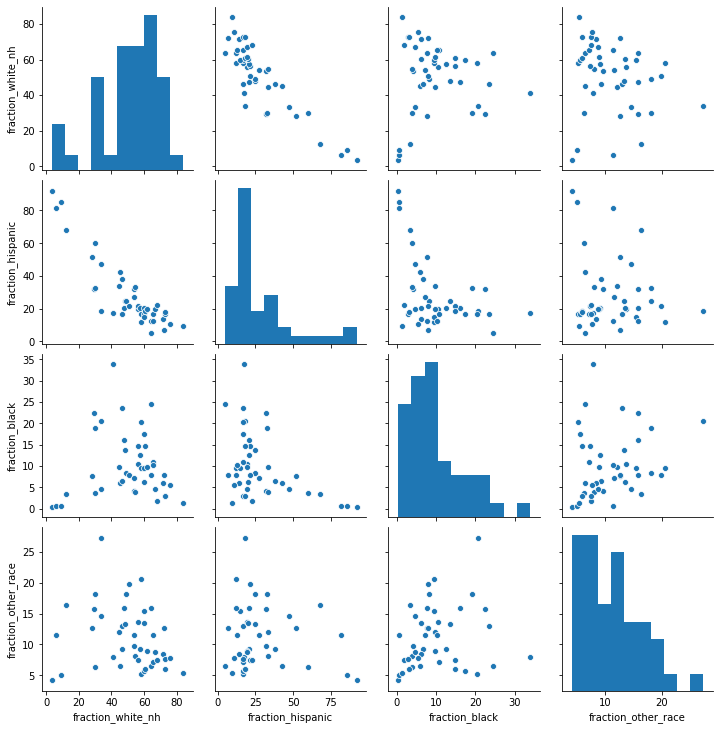

In [43]:
g = sns.pairplot(df_whites[['fraction_white_nh', 'fraction_hispanic','fraction_black', 'fraction_other_race']])

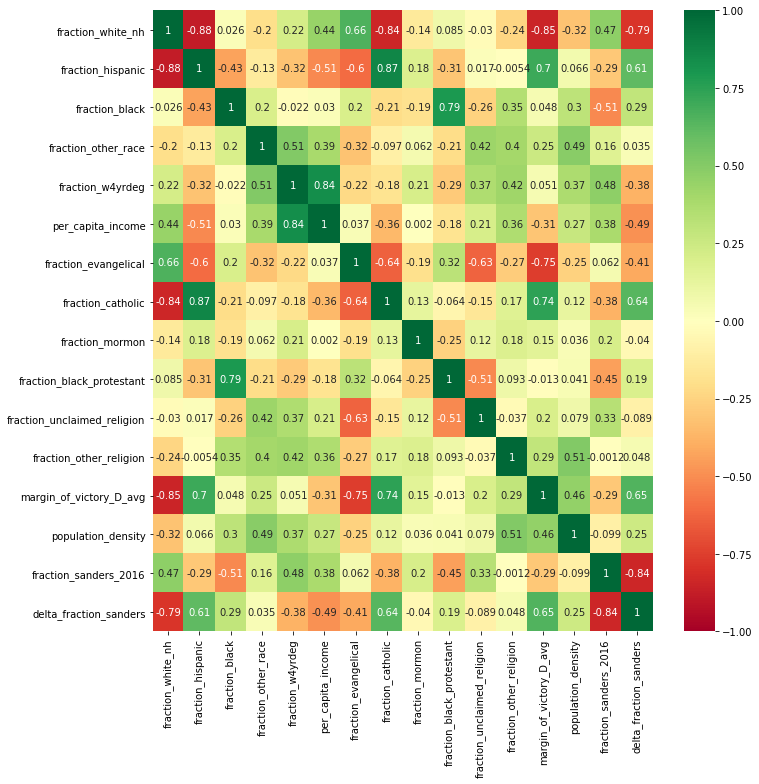

In [44]:
%matplotlib inline
df_for_heatmap = df_all_features_sub[all_training_and_target_names]

#df_for_heatmap['randNumCol'] = vals
#df_for_heatmap['randNumCol2'] = vals2

#get correlations of each features in dataset
#corrmat = data.corr()
#top_corr_features = corrmat.index
plt.figure(figsize=(11,11))
#plot heat map
g=sns.heatmap(df_for_heatmap.corr(),annot=True,cmap="RdYlGn",vmin=-1, vmax=1)
plt.tight_layout()

Text(0.5, 0, 'County ID (sorted by percent White)')

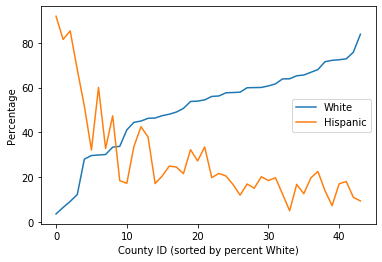

In [45]:
df_whites = df_for_heatmap.sort_values('fraction_white_nh', axis=0)
plt.plot(np.arange(0,len(df_whites)),df_whites['fraction_white_nh'],label='White')
plt.plot(np.arange(0,len(df_whites)),df_whites['fraction_hispanic'],label='Hispanic')
plt.legend()
plt.ylabel('Percentage')
plt.xlabel('County ID (sorted by percent White)')

In [46]:
df_all_features_sorted = df_all_features.sort_values('votes_total_2020',ascending=False)
df_all_features_sorted['votes_total_2020_cumsum'] = df_all_features_sorted['votes_total_2020'].cumsum() \
/df_all_features_sorted['votes_total_2020'].sum()
print(df_all_features_sorted['votes_total_2020_cumsum'].le(0.90).value_counts())
df_all_features_sub = df_all_features_sorted[df_all_features_sorted['votes_total_2020_cumsum'].le(0.90)]

False    218
True      36
Name: votes_total_2020_cumsum, dtype: int64


In [47]:
#features_train = ['fraction_white_nh', 'fraction_hispanic', 'fraction_black', 'fraction_other_race']

X = df_all_features_sub[features_train].drop(['fraction_hispanic','fraction_sanders_2016','fraction_mormon',\
                                          'fraction_black_protestant','fraction_other_religion'],axis=1)
y = df_all_features_sub[target_feature_name]
    
if 'fraction_black' in X.columns: 
    X['log_fraction_black'] = np.log(X['fraction_black'])
    X = X.drop('fraction_black',axis=1)
if 'population_density' in X.columns: 
    X['log_population_density'] = np.log(X['population_density'])
    X = X.drop('population_density',axis=1)
if 'fraction_catholic' in X.columns:
    X['log_fraction_catholic'] = np.log(X['fraction_catholic'])
    X = X.drop('fraction_catholic',axis=1)
if 'fraction_other_race' in X.columns:
    X['log_fraction_other_race'] = np.log(X['fraction_other_race'])
    X = X.drop('fraction_other_race',axis=1)
    
X_constant = sm.add_constant(X) #For statsmodel

## fit a OLS model with intercept
model_fit = sm.OLS(y, X_constant).fit()
print(model_fit.summary())
folds_sm = KFold(n_splits = len(X))
y_pred_sm = cross_val_predict(SMWrapper(sm.OLS), X_constant, y, cv=folds_sm) #SMWrapper(sm.OLS) is identical to model
r2_score_sm = r2(y,y_pred_sm)
print('Predicted R^2',r2_score_sm)

# For each X, calculate VIF and save in dataframe
vif = pd.DataFrame()
X_df = pd.DataFrame(X)
vif["VIF Factor"] = [variance_inflation_factor(X_df.values, i) for i in range(X_df.shape[1])]
vif["features"] = X_df.columns
print(vif)

                              OLS Regression Results                              
Dep. Variable:     delta_fraction_sanders   R-squared:                       0.865
Model:                                OLS   Adj. R-squared:                  0.811
Method:                     Least Squares   F-statistic:                     16.02
Date:                    Mon, 31 Aug 2020   Prob (F-statistic):           1.65e-08
Time:                            15:22:31   Log-Likelihood:                -93.953
No. Observations:                      36   AIC:                             209.9
Df Residuals:                          25   BIC:                             227.3
Df Model:                              10                                         
Covariance Type:                nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------

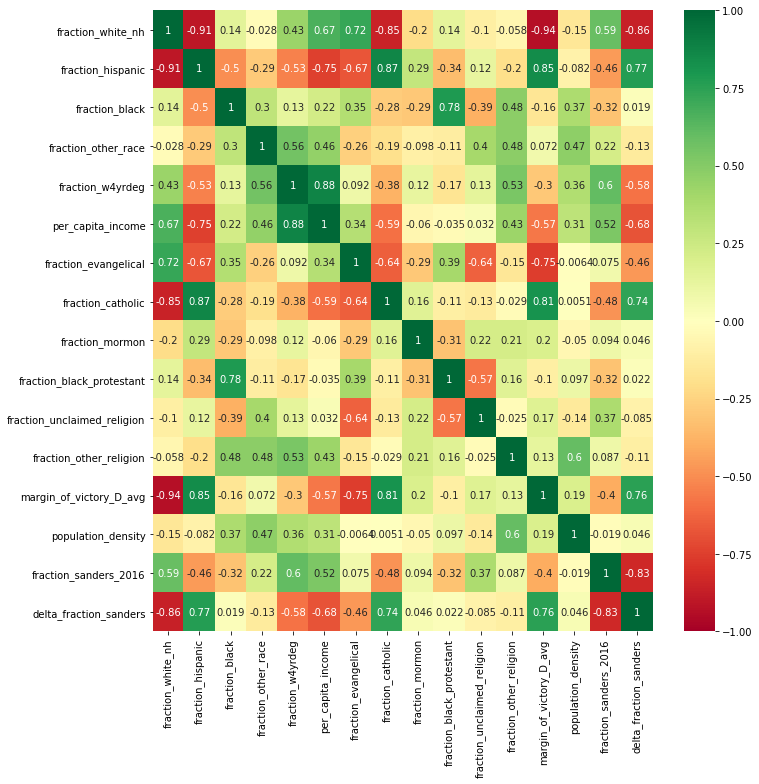

In [48]:
%matplotlib inline
df_for_heatmap = df_all_features_sub[all_training_and_target_names]

#df_for_heatmap['randNumCol'] = vals
#df_for_heatmap['randNumCol2'] = vals2

#get correlations of each features in dataset
#corrmat = data.corr()
#top_corr_features = corrmat.index
plt.figure(figsize=(11,11))
#plot heat map
g=sns.heatmap(df_for_heatmap.corr(),annot=True,cmap="RdYlGn",vmin=-1, vmax=1)
plt.tight_layout()

So white/hispanic (anti-)correlation is even strong when using a subset of counties that make up 85% of 
the total pop and a subset of counties that contain 90% of the Dem voters in 2020.

So this re-inforces your conclusion that Texas populations is too bifurcated. 

In [49]:
#Now forward stepwise selection:

#helper function
def fit_linear_reg(X,Y):
    #Fit linear regression model and return RSS and R squared values
    model_k = linear_model.LinearRegression(fit_intercept = True)
    model_k.fit(X,Y)
    RSS = mean_squared_error(Y,model_k.predict(X)) * len(Y)
    R_squared = model_k.score(X,Y)
    return RSS, R_squared

import itertools
from sklearn.metrics import mean_squared_error

#Initialization variables
X = df_all_features[training_feature_names]
X = df_all_features[features_train].drop(['fraction_hispanic','fraction_sanders_2016','fraction_mormon',\
                                          'fraction_black_protestant','fraction_other_religion'],axis=1)
Y = df_all_features[target_feature_name]
    
if 'fraction_black' in X.columns: 
    X['log_fraction_black'] = np.log(X['fraction_black'])
    X = X.drop('fraction_black',axis=1)
if 'population_density' in X.columns: 
    X['log_population_density'] = np.log(X['population_density'])
    X = X.drop('population_density',axis=1)
if 'fraction_catholic' in X.columns:
    X['log_fraction_catholic'] = np.log(X['fraction_catholic'])
    X = X.drop('fraction_catholic',axis=1)
if 'fraction_other_race' in X.columns:
    X['log_fraction_other_race'] = np.log(X['fraction_other_race'])
    X = X.drop('fraction_other_race',axis=1)

#X_constant = sm.add_constant(X) #For statsmodel
k = X.shape[1] #initally 15

remaining_features = list(X.columns.values)
features = []
RSS_list, R_squared_list = [np.inf], [np.inf] #Due to 1 indexing of the loop...
features_list = dict()

for i in range(1,k+1):
    best_RSS = np.inf
    
    for combo in itertools.combinations(remaining_features,1):

            RSS = fit_linear_reg(X[list(combo) + features],Y)   #Store temp result 

            if RSS[0] < best_RSS:
                best_RSS = RSS[0]
                best_R_squared = RSS[1] 
                best_feature = combo[0]

    #Updating variables for next loop
    features.append(best_feature)
    remaining_features.remove(best_feature)
    
    #Saving values for plotting
    RSS_list.append(best_RSS)
    R_squared_list.append(best_R_squared)
    features_list[i] = features.copy()

In [50]:
df1 = pd.concat([pd.DataFrame({'features':features_list}),pd.DataFrame({'RSS':RSS_list, 'R_squared': R_squared_list})], axis=1, join='inner')
df1['numb_features'] = df1.index

In [51]:
#Initializing useful variables
m = len(Y)
p = k
hat_sigma_squared = (1/(m - p -1)) * min(df1['RSS'])

#Computing
df1['C_p'] = (1/m) * (df1['RSS'] + 2 * df1['numb_features'] * hat_sigma_squared )
df1['AIC'] = (1/(m*hat_sigma_squared)) * (df1['RSS'] + 2 * df1['numb_features'] * hat_sigma_squared )
df1['BIC'] = (1/(m*hat_sigma_squared)) * (df1['RSS'] +  np.log(m) * df1['numb_features'] * hat_sigma_squared )
df1['R_squared_adj'] = 1 - ( (1 - df1['R_squared'])*(m-1)/(m-df1['numb_features'] -1))
df1

,features,RSS,R_squared,numb_features,C_p,AIC,BIC,R_squared_adj
1,[fraction_white_nh],16943.912699,0.355033,1,67.164155,1.160177,1.174103,0.352473
2,"[fraction_white_nh, log_fraction_black]",16155.233257,0.385054,2,64.514955,1.114415,1.142268,0.380154
3,"[fraction_white_nh, log_fraction_black, log_fr...",15269.384243,0.418773,3,61.483197,1.062045,1.103825,0.411799
4,"[fraction_white_nh, log_fraction_black, log_fr...",14718.806435,0.439731,4,59.771405,1.032476,1.088182,0.430731
5,"[fraction_white_nh, log_fraction_black, log_fr...",14469.260001,0.449230,5,59.244776,1.023379,1.093012,0.438126
6,"[fraction_white_nh, log_fraction_black, log_fr...",14093.005478,0.463552,6,58.219296,1.005666,1.089225,0.450521
7,"[fraction_white_nh, log_fraction_black, log_fr...",14079.226433,0.464077,7,58.620885,1.012603,1.110088,0.448827
8,"[fraction_white_nh, log_fraction_black, log_fr...",14070.627783,0.464404,8,59.042869,1.019892,1.131304,0.446915
9,"[fraction_white_nh, log_fraction_black, log_fr...",14068.351621,0.464491,9,59.489745,1.027611,1.152950,0.444738
10,"[fraction_white_nh, log_fraction_black, log_fr...",14067.587426,0.464520,10,59.942573,1.035433,1.174698,0.442483


C_p
['fraction_white_nh', 'log_fraction_black', 'log_fraction_other_race', 'fraction_evangelical', 'fraction_w4yrdeg', 'log_population_density', 'log_fraction_catholic']
AIC
['fraction_white_nh', 'log_fraction_black', 'log_fraction_other_race', 'fraction_evangelical', 'fraction_w4yrdeg', 'log_population_density', 'log_fraction_catholic']
BIC
['fraction_white_nh', 'log_fraction_black', 'log_fraction_other_race', 'fraction_evangelical', 'fraction_w4yrdeg']
R_squared_adj
['fraction_white_nh', 'log_fraction_black', 'log_fraction_other_race', 'fraction_evangelical', 'fraction_w4yrdeg', 'log_population_density', 'log_fraction_catholic']


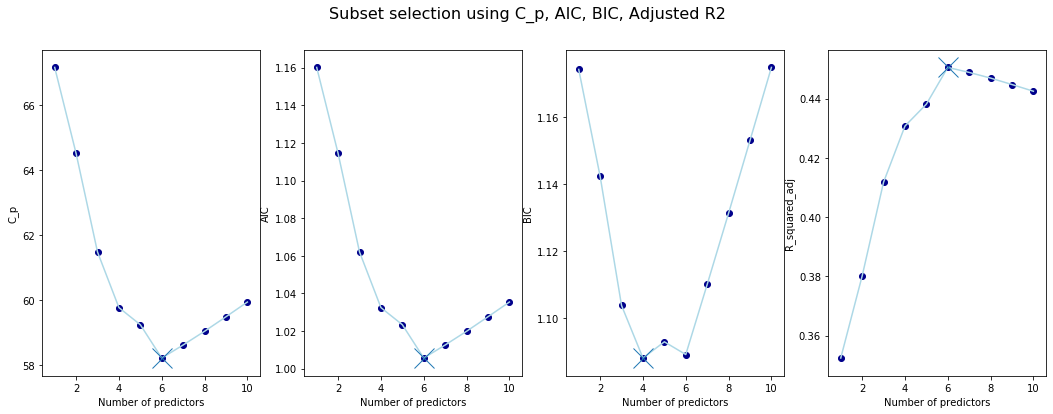

In [52]:
variables = ['C_p', 'AIC','BIC','R_squared_adj']
fig = plt.figure(figsize = (18,6))

for i,v in enumerate(variables):
    print(v)
    ax = fig.add_subplot(1, 4, i+1)
    ax.plot(df1['numb_features'],df1[v], color = 'lightblue')
    ax.scatter(df1['numb_features'],df1[v], color = 'darkblue')
    if v == 'R_squared_adj':
        ax.plot(df1[v].idxmax(),df1[v].max(), marker = 'x', markersize = 20)
        print(df1['features'].iloc[df1[v].idxmax()])
    else:
        ax.plot(df1[v].idxmin(),df1[v].min(), marker = 'x', markersize = 20)
        print(df1['features'].iloc[df1[v].idxmin()])
    ax.set_xlabel('Number of predictors')
    ax.set_ylabel(v)

fig.suptitle('Subset selection using C_p, AIC, BIC, Adjusted R2', fontsize = 16)
plt.show()

In [53]:
#All counties forward stepwise selection
#features_train = ['fraction_white_nh', 'fraction_hispanic', 'fraction_black', 'fraction_other_race']

X = df_all_features[['fraction_white_nh', 'fraction_black', 'fraction_other_race', \
                     'fraction_evangelical', 'fraction_w4yrdeg', 'population_density',\
                     'fraction_catholic']]
y = df_all_features[target_feature_name]
    
if 'fraction_black' in X.columns: 
    X['log_fraction_black'] = np.log(X['fraction_black'])
    X = X.drop('fraction_black',axis=1)
if 'population_density' in X.columns: 
    X['log_population_density'] = np.log(X['population_density'])
    X = X.drop('population_density',axis=1)
if 'fraction_catholic' in X.columns:
    X['log_fraction_catholic'] = np.log(X['fraction_catholic'])
    X = X.drop('fraction_catholic',axis=1)
if 'fraction_other_race' in X.columns:
    X['log_fraction_other_race'] = np.log(X['fraction_other_race'])
    X = X.drop('fraction_other_race',axis=1)

X_constant = sm.add_constant(X) #For statsmodel

## fit a OLS model with intercept
model_fit = sm.OLS(y, X_constant).fit()
print(model_fit.summary())
folds_sm = KFold(n_splits = len(X))
y_pred_sm = cross_val_predict(SMWrapper(sm.OLS), X_constant, y, cv=folds_sm) #SMWrapper(sm.OLS) is identical to model
r2_score_sm = r2(y,y_pred_sm)
print('Predicted R^2',r2_score_sm)

# For each X, calculate VIF and save in dataframe
vif = pd.DataFrame()
X_df = pd.DataFrame(X)
vif["VIF Factor"] = [variance_inflation_factor(X_df.values, i) for i in range(X_df.shape[1])]
vif["features"] = X_df.columns
print(vif)

<ipython-input-53-db6bfbb32497>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['log_fraction_black'] = np.log(X['fraction_black'])


                              OLS Regression Results                              
Dep. Variable:     delta_fraction_sanders   R-squared:                       0.464
Model:                                OLS   Adj. R-squared:                  0.449
Method:                     Least Squares   F-statistic:                     30.43
Date:                    Mon, 31 Aug 2020   Prob (F-statistic):           3.76e-30
Time:                            15:22:34   Log-Likelihood:                -870.33
No. Observations:                     254   AIC:                             1757.
Df Residuals:                         246   BIC:                             1785.
Df Model:                               7                                         
Covariance Type:                nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------

In [54]:
#All counties forward stepwise selection
#features_train = ['fraction_white_nh', 'fraction_hispanic', 'fraction_black', 'fraction_other_race']

X = df_all_features[['fraction_white_nh', 'fraction_black', 'fraction_other_race']]
y = df_all_features[target_feature_name]
    
if 'fraction_black' in X.columns: 
    X['log_fraction_black'] = np.log(X['fraction_black'])
    X = X.drop('fraction_black',axis=1)
if 'population_density' in X.columns: 
    X['log_population_density'] = np.log(X['population_density'])
    X = X.drop('population_density',axis=1)
if 'fraction_catholic' in X.columns:
    X['log_fraction_catholic'] = np.log(X['fraction_catholic'])
    X = X.drop('fraction_catholic',axis=1)
if 'fraction_other_race' in X.columns:
    X['log_fraction_other_race'] = np.log(X['fraction_other_race'])
    X = X.drop('fraction_other_race',axis=1)

X_constant = sm.add_constant(X) #For statsmodel

## fit a OLS model with intercept
model_fit = sm.OLS(y, X_constant).fit()
print(model_fit.summary())
folds_sm = KFold(n_splits = len(X))
y_pred_sm = cross_val_predict(SMWrapper(sm.OLS), X_constant, y, cv=folds_sm) #SMWrapper(sm.OLS) is identical to model
r2_score_sm = r2(y,y_pred_sm)
print('Predicted R^2',r2_score_sm)

# For each X, calculate VIF and save in dataframe
vif = pd.DataFrame()
X_df = pd.DataFrame(X)
vif["VIF Factor"] = [variance_inflation_factor(X_df.values, i) for i in range(X_df.shape[1])]
vif["features"] = X_df.columns
print(vif)

                              OLS Regression Results                              
Dep. Variable:     delta_fraction_sanders   R-squared:                       0.419
Model:                                OLS   Adj. R-squared:                  0.412
Method:                     Least Squares   F-statistic:                     60.04
Date:                    Mon, 31 Aug 2020   Prob (F-statistic):           2.88e-29
Time:                            15:22:37   Log-Likelihood:                -880.64
No. Observations:                     254   AIC:                             1769.
Df Residuals:                         250   BIC:                             1783.
Df Model:                               3                                         
Covariance Type:                nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------

<ipython-input-54-6bf828103e3c>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['log_fraction_black'] = np.log(X['fraction_black'])


Predicted R^2 0.3939094287414129
   VIF Factor                 features
0    3.637555        fraction_white_nh
1    1.613324       log_fraction_black
2    3.742407  log_fraction_other_race


In [55]:
print(X_constant.columns)
df2 = pd.DataFrame(np.array([np.ones(200),np.arange(0,100,0.5), np.zeros(200)-2, np.zeros(200)-2]).T,
                   columns=X_constant.columns)

Index(['const', 'fraction_white_nh', 'log_fraction_black',
       'log_fraction_other_race'],
      dtype='object')


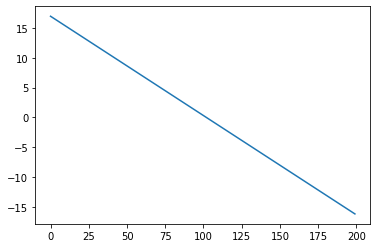

In [56]:
plt.plot(model_fit.predict(exog=sm.add_constant(df2)))

In [57]:
#All counties forward stepwise selection
#features_train = ['fraction_white_nh', 'fraction_hispanic', 'fraction_black', 'fraction_other_race']

X = df_all_features[['fraction_white_nh', 'fraction_black', 'fraction_other_race','fraction_catholic']]
y = df_all_features[target_feature_name]
    
if 'fraction_black' in X.columns: 
    X['log_fraction_black'] = np.log(X['fraction_black'])
    X = X.drop('fraction_black',axis=1)
if 'population_density' in X.columns: 
    X['log_population_density'] = np.log(X['population_density'])
    X = X.drop('population_density',axis=1)
if 'fraction_catholic' in X.columns:
    X['log_fraction_catholic'] = np.log(X['fraction_catholic'])
    X = X.drop('fraction_catholic',axis=1)
if 'fraction_other_race' in X.columns:
    X['log_fraction_other_race'] = np.log(X['fraction_other_race'])
    X = X.drop('fraction_other_race',axis=1)

X_constant = sm.add_constant(X) #For statsmodel

## fit a OLS model with intercept
model_fit = sm.OLS(y, X_constant).fit()
print(model_fit.summary())
folds_sm = KFold(n_splits = len(X))
y_pred_sm = cross_val_predict(SMWrapper(sm.OLS), X_constant, y, cv=folds_sm) #SMWrapper(sm.OLS) is identical to model
r2_score_sm = r2(y,y_pred_sm)
print('Predicted R^2',r2_score_sm)

# For each X, calculate VIF and save in dataframe
vif = pd.DataFrame()
X_df = pd.DataFrame(X)
vif["VIF Factor"] = [variance_inflation_factor(X_df.values, i) for i in range(X_df.shape[1])]
vif["features"] = X_df.columns
print(vif)

<ipython-input-57-120008d3bf11>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['log_fraction_black'] = np.log(X['fraction_black'])


                              OLS Regression Results                              
Dep. Variable:     delta_fraction_sanders   R-squared:                       0.419
Model:                                OLS   Adj. R-squared:                  0.409
Method:                     Least Squares   F-statistic:                     44.85
Date:                    Mon, 31 Aug 2020   Prob (F-statistic):           2.43e-28
Time:                            15:22:39   Log-Likelihood:                -880.64
No. Observations:                     254   AIC:                             1771.
Df Residuals:                         249   BIC:                             1789.
Df Model:                               4                                         
Covariance Type:                nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------

In [58]:
#All counties forward stepwise selection
#features_train = ['fraction_white_nh', 'fraction_hispanic', 'fraction_black', 'fraction_other_race']

X = df_all_features[['fraction_white_nh', 'fraction_black','fraction_catholic']]
y = df_all_features[target_feature_name]
    
if 'fraction_black' in X.columns: 
    X['log_fraction_black'] = np.log(X['fraction_black'])
    X = X.drop('fraction_black',axis=1)
if 'population_density' in X.columns: 
    X['log_population_density'] = np.log(X['population_density'])
    X = X.drop('population_density',axis=1)
if 'fraction_catholic' in X.columns:
    X['log_fraction_catholic'] = np.log(X['fraction_catholic'])
    X = X.drop('fraction_catholic',axis=1)
if 'fraction_other_race' in X.columns:
    X['log_fraction_other_race'] = np.log(X['fraction_other_race'])
    X = X.drop('fraction_other_race',axis=1)

X_constant = sm.add_constant(X) #For statsmodel

## fit a OLS model with intercept
model_fit = sm.OLS(y, X_constant).fit()
print(model_fit.summary())
folds_sm = KFold(n_splits = len(X))
y_pred_sm = cross_val_predict(SMWrapper(sm.OLS), X_constant, y, cv=folds_sm) #SMWrapper(sm.OLS) is identical to model
r2_score_sm = r2(y,y_pred_sm)
print('Predicted R^2',r2_score_sm)

# For each X, calculate VIF and save in dataframe
vif = pd.DataFrame()
X_df = pd.DataFrame(X)
vif["VIF Factor"] = [variance_inflation_factor(X_df.values, i) for i in range(X_df.shape[1])]
vif["features"] = X_df.columns
print(vif)

                              OLS Regression Results                              
Dep. Variable:     delta_fraction_sanders   R-squared:                       0.386
Model:                                OLS   Adj. R-squared:                  0.378
Method:                     Least Squares   F-statistic:                     52.32
Date:                    Mon, 31 Aug 2020   Prob (F-statistic):           2.80e-26
Time:                            15:22:41   Log-Likelihood:                -887.67
No. Observations:                     254   AIC:                             1783.
Df Residuals:                         250   BIC:                             1797.
Df Model:                               3                                         
Covariance Type:                nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------

<ipython-input-58-897348841a55>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['log_fraction_black'] = np.log(X['fraction_black'])


Predicted R^2 0.34898540310252024
   VIF Factor               features
0    2.415316      fraction_white_nh
1    1.538905     log_fraction_black
2    2.081271  log_fraction_catholic


In [59]:
#All counties forward stepwise selection
#features_train = ['fraction_white_nh', 'fraction_hispanic', 'fraction_black', 'fraction_other_race']

X = df_all_features[['fraction_white_nh', 'fraction_black', 'fraction_other_race', 'population_density']]
y = df_all_features[target_feature_name]
    
if 'fraction_black' in X.columns: 
    X['log_fraction_black'] = np.log(X['fraction_black'])
    X = X.drop('fraction_black',axis=1)
if 'population_density' in X.columns: 
    X['log_population_density'] = np.log(X['population_density'])
    X = X.drop('population_density',axis=1)
if 'fraction_catholic' in X.columns:
    X['log_fraction_catholic'] = np.log(X['fraction_catholic'])
    X = X.drop('fraction_catholic',axis=1)
if 'fraction_other_race' in X.columns:
    X['log_fraction_other_race'] = np.log(X['fraction_other_race'])
    X = X.drop('fraction_other_race',axis=1)

X_constant = sm.add_constant(X) #For statsmodel

## fit a OLS model with intercept
model_fit = sm.OLS(y, X_constant).fit()
print(model_fit.summary())
folds_sm = KFold(n_splits = len(X))
y_pred_sm = cross_val_predict(SMWrapper(sm.OLS), X_constant, y, cv=folds_sm) #SMWrapper(sm.OLS) is identical to model
r2_score_sm = r2(y,y_pred_sm)
print('Predicted R^2',r2_score_sm)

# For each X, calculate VIF and save in dataframe
vif = pd.DataFrame()
X_df = pd.DataFrame(X)
vif["VIF Factor"] = [variance_inflation_factor(X_df.values, i) for i in range(X_df.shape[1])]
vif["features"] = X_df.columns
print(vif)

                              OLS Regression Results                              
Dep. Variable:     delta_fraction_sanders   R-squared:                       0.427
Model:                                OLS   Adj. R-squared:                  0.418
Method:                     Least Squares   F-statistic:                     46.42
Date:                    Mon, 31 Aug 2020   Prob (F-statistic):           4.06e-29
Time:                            15:22:44   Log-Likelihood:                -878.79
No. Observations:                     254   AIC:                             1768.
Df Residuals:                         249   BIC:                             1785.
Df Model:                               4                                         
Covariance Type:                nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------

<ipython-input-59-06b394c543d1>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['log_fraction_black'] = np.log(X['fraction_black'])


Predicted R^2 0.3963078516979228
   VIF Factor                 features
0    3.915078        fraction_white_nh
1    2.072917       log_fraction_black
2    4.746251   log_population_density
3    4.682165  log_fraction_other_race


In [60]:
#All counties forward stepwise selection
#features_train = ['fraction_white_nh', 'fraction_hispanic', 'fraction_black', 'fraction_other_race']

X = df_all_features[['fraction_white_nh', 'fraction_black', 'fraction_other_race', 'fraction_w4yrdeg']]
y = df_all_features[target_feature_name]
    
if 'fraction_black' in X.columns: 
    X['log_fraction_black'] = np.log(X['fraction_black'])
    X = X.drop('fraction_black',axis=1)
if 'population_density' in X.columns: 
    X['log_population_density'] = np.log(X['population_density'])
    X = X.drop('population_density',axis=1)
if 'fraction_catholic' in X.columns:
    X['log_fraction_catholic'] = np.log(X['fraction_catholic'])
    X = X.drop('fraction_catholic',axis=1)
if 'fraction_other_race' in X.columns:
    X['log_fraction_other_race'] = np.log(X['fraction_other_race'])
    X = X.drop('fraction_other_race',axis=1)

X_constant = sm.add_constant(X) #For statsmodel

## fit a OLS model with intercept
model_fit = sm.OLS(y, X_constant).fit()
print(model_fit.summary())
folds_sm = KFold(n_splits = len(X))
y_pred_sm = cross_val_predict(SMWrapper(sm.OLS), X_constant, y, cv=folds_sm) #SMWrapper(sm.OLS) is identical to model
r2_score_sm = r2(y,y_pred_sm)
print('Predicted R^2',r2_score_sm)

# For each X, calculate VIF and save in dataframe
vif = pd.DataFrame()
X_df = pd.DataFrame(X)
vif["VIF Factor"] = [variance_inflation_factor(X_df.values, i) for i in range(X_df.shape[1])]
vif["features"] = X_df.columns
print(vif)

                              OLS Regression Results                              
Dep. Variable:     delta_fraction_sanders   R-squared:                       0.424
Model:                                OLS   Adj. R-squared:                  0.415
Method:                     Least Squares   F-statistic:                     45.81
Date:                    Mon, 31 Aug 2020   Prob (F-statistic):           8.15e-29
Time:                            15:22:46   Log-Likelihood:                -879.51
No. Observations:                     254   AIC:                             1769.
Df Residuals:                         249   BIC:                             1787.
Df Model:                               4                                         
Covariance Type:                nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------

<ipython-input-60-e6a013f2eac9>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['log_fraction_black'] = np.log(X['fraction_black'])


Predicted R^2 0.3958484335530553
   VIF Factor                 features
0    6.128398        fraction_white_nh
1    8.588327         fraction_w4yrdeg
2    1.631496       log_fraction_black
3    5.626314  log_fraction_other_race


In [61]:
#All counties forward stepwise selection
#features_train = ['fraction_white_nh', 'fraction_hispanic', 'fraction_black', 'fraction_other_race']

X = df_all_features[['fraction_white_nh', 'fraction_black','fraction_w4yrdeg']]
y = df_all_features[target_feature_name]
    
if 'fraction_black' in X.columns: 
    X['log_fraction_black'] = np.log(X['fraction_black'])
    X = X.drop('fraction_black',axis=1)
if 'population_density' in X.columns: 
    X['log_population_density'] = np.log(X['population_density'])
    X = X.drop('population_density',axis=1)
if 'fraction_catholic' in X.columns:
    X['log_fraction_catholic'] = np.log(X['fraction_catholic'])
    X = X.drop('fraction_catholic',axis=1)
if 'fraction_other_race' in X.columns:
    X['log_fraction_other_race'] = np.log(X['fraction_other_race'])
    X = X.drop('fraction_other_race',axis=1)

X_constant = sm.add_constant(X) #For statsmodel

## fit a OLS model with intercept
model_fit = sm.OLS(y, X_constant).fit()
print(model_fit.summary())
folds_sm = KFold(n_splits = len(X))
y_pred_sm = cross_val_predict(SMWrapper(sm.OLS), X_constant, y, cv=folds_sm) #SMWrapper(sm.OLS) is identical to model
r2_score_sm = r2(y,y_pred_sm)
print('Predicted R^2',r2_score_sm)

# For each X, calculate VIF and save in dataframe
vif = pd.DataFrame()
X_df = pd.DataFrame(X)
vif["VIF Factor"] = [variance_inflation_factor(X_df.values, i) for i in range(X_df.shape[1])]
vif["features"] = X_df.columns
print(vif)

                              OLS Regression Results                              
Dep. Variable:     delta_fraction_sanders   R-squared:                       0.397
Model:                                OLS   Adj. R-squared:                  0.389
Method:                     Least Squares   F-statistic:                     54.76
Date:                    Mon, 31 Aug 2020   Prob (F-statistic):           3.06e-27
Time:                            15:22:49   Log-Likelihood:                -885.41
No. Observations:                     254   AIC:                             1779.
Df Residuals:                         250   BIC:                             1793.
Df Model:                               3                                         
Covariance Type:                nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------

<ipython-input-61-37bd57d519ec>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['log_fraction_black'] = np.log(X['fraction_black'])


Predicted R^2 0.3737094751194492
   VIF Factor            features
0    6.053177   fraction_white_nh
1    5.712624    fraction_w4yrdeg
2    1.522265  log_fraction_black


In [62]:
#All counties forward stepwise selection
#features_train = ['fraction_white_nh', 'fraction_hispanic', 'fraction_black', 'fraction_other_race']

X = df_all_features[['fraction_hispanic', 'fraction_black','fraction_w4yrdeg']]
y = df_all_features[target_feature_name]
    
if 'fraction_black' in X.columns: 
    X['log_fraction_black'] = np.log(X['fraction_black'])
    X = X.drop('fraction_black',axis=1)
if 'population_density' in X.columns: 
    X['log_population_density'] = np.log(X['population_density'])
    X = X.drop('population_density',axis=1)
if 'fraction_catholic' in X.columns:
    X['log_fraction_catholic'] = np.log(X['fraction_catholic'])
    X = X.drop('fraction_catholic',axis=1)
if 'fraction_other_race' in X.columns:
    X['log_fraction_other_race'] = np.log(X['fraction_other_race'])
    X = X.drop('fraction_other_race',axis=1)

X_constant = sm.add_constant(X) #For statsmodel

## fit a OLS model with intercept
model_fit = sm.OLS(y, X_constant).fit()
print(model_fit.summary())
folds_sm = KFold(n_splits = len(X))
y_pred_sm = cross_val_predict(SMWrapper(sm.OLS), X_constant, y, cv=folds_sm) #SMWrapper(sm.OLS) is identical to model
r2_score_sm = r2(y,y_pred_sm)
print('Predicted R^2',r2_score_sm)

# For each X, calculate VIF and save in dataframe
vif = pd.DataFrame()
X_df = pd.DataFrame(X)
vif["VIF Factor"] = [variance_inflation_factor(X_df.values, i) for i in range(X_df.shape[1])]
vif["features"] = X_df.columns
print(vif)

                              OLS Regression Results                              
Dep. Variable:     delta_fraction_sanders   R-squared:                       0.333
Model:                                OLS   Adj. R-squared:                  0.325
Method:                     Least Squares   F-statistic:                     41.70
Date:                    Mon, 31 Aug 2020   Prob (F-statistic):           6.96e-22
Time:                            15:22:51   Log-Likelihood:                -898.02
No. Observations:                     254   AIC:                             1804.
Df Residuals:                         250   BIC:                             1818.
Df Model:                               3                                         
Covariance Type:                nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------

<ipython-input-62-4309aebba347>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['log_fraction_black'] = np.log(X['fraction_black'])


Predicted R^2 0.30852869521795623
   VIF Factor            features
0    1.966091   fraction_hispanic
1    2.623596    fraction_w4yrdeg
2    1.486572  log_fraction_black


In [63]:
#All counties forward stepwise selection
#features_train = ['fraction_white_nh', 'fraction_hispanic', 'fraction_black', 'fraction_other_race']

X = df_all_features[['fraction_white_nh', 'fraction_black','fraction_unclaimed_religion']]
y = df_all_features[target_feature_name]
    
if 'fraction_black' in X.columns: 
    X['log_fraction_black'] = np.log(X['fraction_black'])
    X = X.drop('fraction_black',axis=1)
if 'population_density' in X.columns: 
    X['log_population_density'] = np.log(X['population_density'])
    X = X.drop('population_density',axis=1)
if 'fraction_catholic' in X.columns:
    X['log_fraction_catholic'] = np.log(X['fraction_catholic'])
    X = X.drop('fraction_catholic',axis=1)
if 'fraction_other_race' in X.columns:
    X['log_fraction_other_race'] = np.log(X['fraction_other_race'])
    X = X.drop('fraction_other_race',axis=1)

X_constant = sm.add_constant(X) #For statsmodel

## fit a OLS model with intercept
model_fit = sm.OLS(y, X_constant).fit()
print(model_fit.summary())
folds_sm = KFold(n_splits = len(X))
y_pred_sm = cross_val_predict(SMWrapper(sm.OLS), X_constant, y, cv=folds_sm) #SMWrapper(sm.OLS) is identical to model
r2_score_sm = r2(y,y_pred_sm)
print('Predicted R^2',r2_score_sm)

# For each X, calculate VIF and save in dataframe
vif = pd.DataFrame()
X_df = pd.DataFrame(X)
vif["VIF Factor"] = [variance_inflation_factor(X_df.values, i) for i in range(X_df.shape[1])]
vif["features"] = X_df.columns
print(vif)

                              OLS Regression Results                              
Dep. Variable:     delta_fraction_sanders   R-squared:                       0.406
Model:                                OLS   Adj. R-squared:                  0.399
Method:                     Least Squares   F-statistic:                     56.87
Date:                    Mon, 31 Aug 2020   Prob (F-statistic):           4.63e-28
Time:                            15:22:53   Log-Likelihood:                -883.48
No. Observations:                     254   AIC:                             1775.
Df Residuals:                         250   BIC:                             1789.
Df Model:                               3                                         
Covariance Type:                nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------

<ipython-input-63-a0c3c0418214>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['log_fraction_black'] = np.log(X['fraction_black'])


Predicted R^2 0.37878923359437444
   VIF Factor                     features
0    4.038666            fraction_white_nh
1    3.957313  fraction_unclaimed_religion
2    1.562054           log_fraction_black
